In [1]:
# Import

import numpy as np

# GRU

### Formulas

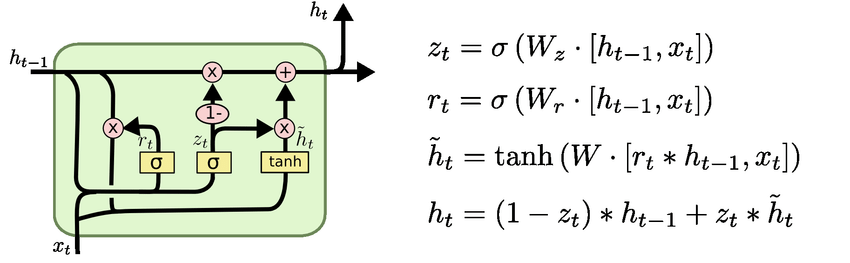
<br>
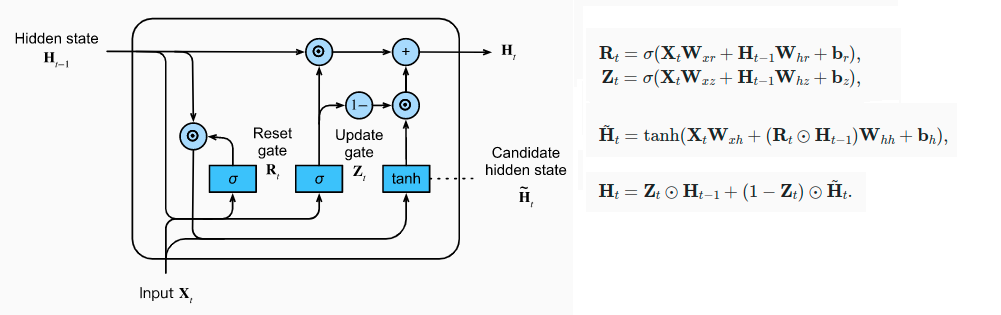

In [2]:
# Parameters setting

num_units=64
num_samples = step = 40
num_inputs = 1
num_output = num_classes = 3

In [3]:
# Weights initializing

# x = num_samples * num_inputs = 40 *1
# H = num_samples * num_units = 1 * 64

def initialize_params(num_inputs, num_units, num_output):

    def normal_values_generation(shape):
        return np.random.normal(0, 1, size = shape)

    def weights_matrix_dimensions():
        return (normal_values_generation((num_inputs, num_units)),
                normal_values_generation((num_units, num_units)),
                normal_values_generation(num_units))

    W_xz, W_hz, b_z = weights_matrix_dimensions()  # Update gate parameters(Z_t)
    W_xr, W_hr, b_r = weights_matrix_dimensions()  # Reset gate parameters(R_t)
    W_xh, W_hh, b_h = weights_matrix_dimensions()  # Candidate hidden state parameters(H~_t)

    # Output dense layer parameters
    W_d = normal_values_generation((num_units, num_output))
    b_d = normal_values_generation(num_output)

    params = [W_xz, W_hz, b_z, W_xr, W_hr, b_r, W_xh, W_hh, b_h, W_d, b_d]
    
    return params

In [4]:
# GRU implementation

def gru(inputs, params):
    W_xz, W_hz, b_z, W_xr, W_hr, b_r, W_xh, W_hh, b_h, _, _= params
    H = np.random.normal(0, 1, size =(num_inputs, num_units))

    for x in inputs:
        x = np.reshape(x, [-1, W_xh.shape[0]])

        Z = 1 / (1 + np.exp(-(np.matmul(x, W_xz) + np.matmul(H, W_hz) + b_z)))
        R = 1 / (1 + np.exp(-(np.matmul(x, W_xr) + np.matmul(H, W_hr) + b_r)))

        input_H_tilda = np.matmul(x, W_xh) + np.matmul(R * H, W_hh) + b_h
        H_tilda = (np.exp(input_H_tilda) - np.exp(-input_H_tilda)) / (np.exp(input_H_tilda) + np.exp(-input_H_tilda))

        H = Z * H + (1 - Z) * H_tilda

    return H

In [5]:
# Inference on Sine Signal

N = 40
t = np.arange(0, N)

x = np.sin(t * 0.02)/2 + np.random.uniform(-0.05, 0.05, N)

params = initialize_params(num_inputs, num_units, num_output)
gru_output = gru(x, params)

_, _, _, _, _, _, _, _, _, W_d, b_d = params

dense_layer_output = np.matmul(gru_output, W_d) + b_d
final_output = np.exp(dense_layer_output) / np.sum(np.exp(dense_layer_output))
predict = np.argmax(final_output)

print("dense layey output: ", dense_layer_output)
print("softmax output: ", final_output)
print("class predicted: ", predict)


dense layey output:  [[ -6.22938295   2.01555899 -10.45691609]]
softmax output:  [[2.62513429e-04 9.99733657e-01 3.82963346e-06]]
class predicted:  1
